First-order plus deadtime (FOPDT) model.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

$\tau \frac{dy(t)}{dt} = -y(t) + K u(t - \theta) $

In [3]:
def create_fopdt(k, tau, theta, u_func):
    
    def model(y, t):
        
        u = u_func(t - theta)
        
        return (1. / tau) * (-y + k * u)
    
    return model

In [4]:
# Gain
k = 3.

# Time constant
tau = 2.

# Deadtime (delay)
theta = 0.5

# Step input parameters
step_t = 2.
step_val = 1.


def step_input(t):    
    return 0. if t < step_t else step_val
    

m = create_fopdt(k, tau, theta, u_func=step_input)

In [5]:
t = np.linspace(0, 15)

y_sim = odeint(m, 0, t)

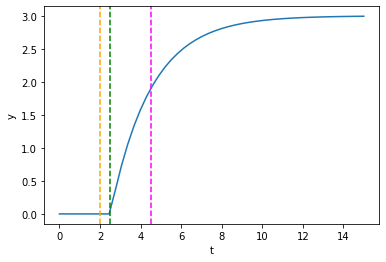

In [6]:
plt.plot(t, y_sim)

plt.axvline(step_t, linestyle='--', color='orange')
plt.axvline(step_t + theta, linestyle='--', color='green')
plt.axvline(step_t + theta + tau, linestyle='--', color='magenta')

plt.xlabel('t')
plt.ylabel('y')
plt.show()